In [23]:
%reload_ext autoreload
%autoreload 3

from nilearn.interfaces.bids import get_bids_files
from python.acnets.parcellations import gordon, dosenbach, difumo
from python.acnets.pipeline import Parcellation, NetworkAggregator
import matplotlib.pyplot as plt
import re

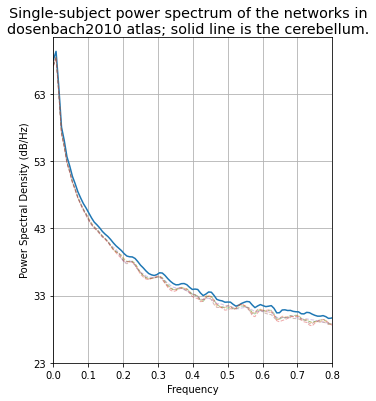

In [36]:

img_files = get_bids_files(
    'data/julia2018/derivatives/fmriprep_2020',
    file_tag='bold',
    modality_folder='func',
    filters=[('ses', 'rest')],
    file_type='nii.gz')

masker, labels = gordon.load_masker('gordon2014_2mm', None)
masker, labels = dosenbach.load_masker('dosenbach2010', None)
# masker, labels = difumo.load_masker('difumo_64_2mm', None)

aggregator = NetworkAggregator(labels).fit()
cerebellum_idxs = [i for i,n in enumerate(aggregator.networks_) if re.search('cerebellum', n)]

for img in img_files[:1]:
    ts = masker.fit().transform(img).T
    ts = aggregator.transform(ts.T).T
    plt.subplots(1,1,figsize=(5,6))
    plt.subplot(111)
    lines = [plt.psd(tss, return_line=True) for tss in ts]
    lines = [line[0] for (_,_,line) in lines]
    for i,l in enumerate(lines):
        if i not in cerebellum_idxs:
            l.set_linestyle('--')
            l.set_linewidth(1)
            l.set_label('other')
            l.set_alpha(.4)
    plt.xlim(0, .8)
    plt.suptitle('Single-subject power spectrum of the networks in\n'
                 'dosenbach2010 atlas; solid line is the cerebellum.',
                 y=.95, fontsize='x-large')
    
    plt.show()